In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [131]:
file_path_train = r'C:\Users\User\Desktop\Main\7 semester\ML\Invistico_Airline.csv'
df_train = pd.read_csv(file_path_train)
df_train.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [132]:
df_train.shape

(129880, 22)

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [134]:
print(df_train.isnull().sum())

for item in df_train.isnull().sum():
    if item > 258:
        print(item)

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
393


In [135]:
df_train['Arrival Delay in Minutes'].dtype

dtype('float64')

In [136]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())

In [137]:
print(df_train.isnull().sum())

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


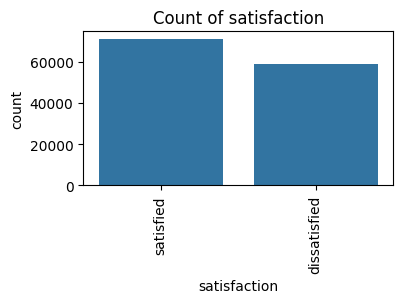

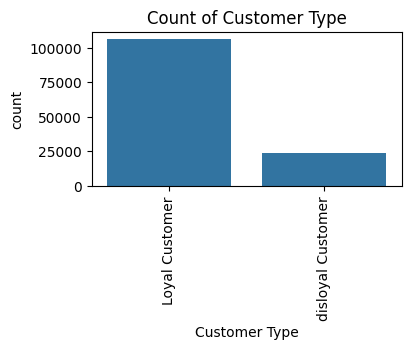

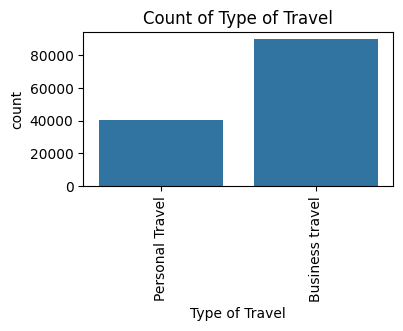

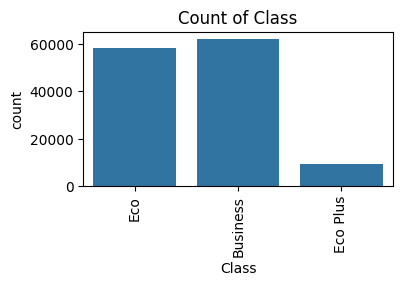

In [138]:
for column_name in df_train.columns:
    if df_train[column_name].dtype == 'object':
        plt.figure(figsize=(4, 2))  
        sns.countplot(x=column_name, data=df_train)
        plt.title(f'Count of {column_name}')
        plt.xticks(rotation=90) 
        plt.show()

In [139]:
for item in df_train.isnull().sum() > 0:
    if item == True:
        print(item)

In [140]:
satisfaction_mapping = {'satisfied': 1, 'dissatisfied': 0}
df_train['satisfaction'] = df_train['satisfaction'].map(satisfaction_mapping)
df_train.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [141]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [142]:
# Perform one-hot encoding
categorical_columns = df_train.select_dtypes(include=['object'])
df_train_encoded = pd.get_dummies(df_train, columns=categorical_columns.columns)
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Flight Distance                    129880 non-null  int64  
 3   Seat comfort                       129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   Online support                     129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  On-board service                   1298

In [143]:
Y = df_train_encoded['satisfaction']
X = df_train_encoded.drop('satisfaction', axis=1)
X, Y

(        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
 0        65              265             0                                  0   
 1        47             2464             0                                  0   
 2        15             2138             0                                  0   
 3        60              623             0                                  0   
 4        70              354             0                                  0   
 ...     ...              ...           ...                                ...   
 129875   29             1731             5                                  5   
 129876   63             2087             2                                  3   
 129877   69             2320             3                                  0   
 129878   66             2450             3                                  2   
 129879   38             4307             3                                  4   
 
         Food 

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[ 1.69135082, -1.6711027 , -2.03779055, ..., -0.95806953,
         1.10790047, -0.27949898],
       [ 0.50081965,  0.46985247, -2.03779055, ...,  1.04376558,
        -0.90260816, -0.27949898],
       [-1.61568021,  0.15245757, -2.03779055, ..., -0.95806953,
         1.10790047, -0.27949898],
       ...,
       [ 1.9559133 ,  0.32965349,  0.11586891, ..., -0.95806953,
         1.10790047, -0.27949898],
       [ 1.75749144,  0.45622201,  0.11586891, ..., -0.95806953,
         1.10790047, -0.27949898],
       [-0.09444593,  2.26420462,  0.11586891, ..., -0.95806953,
         1.10790047, -0.27949898]])

In [145]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)
X_train

array([[ 1.69135082, -1.57861032,  0.8337554 , ..., -0.95806953,
         1.10790047, -0.27949898],
       [-1.74796145,  0.98294177, -1.31990406, ..., -0.95806953,
         1.10790047, -0.27949898],
       [ 1.22836648, -0.07633937,  0.11586891, ...,  1.04376558,
        -0.90260816, -0.27949898],
       ...,
       [ 1.6252102 , -0.75494135, -1.31990406, ..., -0.95806953,
         1.10790047, -0.27949898],
       [-1.15269586, -0.7675982 ,  0.11586891, ..., -0.95806953,
         1.10790047, -0.27949898],
       [ 0.56696027, -1.69057478,  1.55164189, ..., -0.95806953,
         1.10790047, -0.27949898]])

In [146]:
class LogisticRegression:
    def __init__(self, X, y, X_t, y_t, learning_rate, epoch):
        self.X = X
        self.y = y
        self.X_t = X_t
        self.y_t = y_t
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.w = None
        self.b = None
    
    def logistic_regression_model(self):
        lenw = self.X.shape[1]
        self.w = np.zeros((lenw, 1))
        self.b = 0
        
        for i in range(self.epoch):
            z = np.dot(self.X, self.w) + self.b
            sigmoid = 1 / (1 + np.exp(-z))
            dz = 1 / (len(self.X)) * (sigmoid - y0)
            dw = np.dot(self.X.T, dz)
            db = np.sum(dz)
            old_w = self.w
            old_b = self.b
    
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
    
            if (np.abs(dw) == 0).all() or (np.abs(db) == 0).all():
                print(f"Converged after {i + 1} iterations")
                break   
        return self.w, self.b
     
    def predict(self):
        z = np.dot(self.X_t, self.w) + self.b
        y_hat = 1 / (1 + np.exp(-z))
        y_hat_val = (y_hat >= 0.5).astype(int)
        return y_hat_val

    def accuracy(self):
        y_hat_val = self.predict()
        return np.sum(self.y_t == y_hat_val) / len(self.y_t)

    def confusion_matrix(self):
        y_hat_val = self.predict()
        return confusion_matrix(self.y_t, y_hat_val)
    
    def roc_auc(self):
        y_hat_val = self.predict()
        return roc_auc_score(self.y_t, y_hat_val)

In [147]:
y = y_train.to_numpy()
y_t = y_test.to_numpy()
y0 = y.reshape(len(y), 1)
y_t_0 = y_t.reshape(len(y_test), 1)
X_train.shape, y.shape, y0.shape, y_t.shape, y_t_0.shape

((103904, 25), (103904,), (103904, 1), (25976,), (25976, 1))

In [148]:
model = LogisticRegression(X_train, y0, X_test, y_t_0, learning_rate=0.0001, epoch=1000)
model.logistic_regression_model()

acc = model.accuracy()
print("Accuracy:", acc)

cm = model.confusion_matrix()
print("Confusion Matrix:", cm)

ra = model.roc_auc()
print("ROC-AUC Score:", ra)

Accuracy: 0.8074761318139821
Confusion Matrix: [[ 9493  2182]
 [ 2819 11482]]
ROC-AUC Score: 0.8079929212359477


In [149]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression()

model_sk.fit(X_train, y_train)

y_pred_sk = model_sk.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sk)
print("Accuracy:", accuracy)

c_matrix = confusion_matrix(y_test, y_pred_sk)
print("Confusion Matrix:", c_matrix)

ra_score = roc_auc_score(y_test, y_pred_sk)
print("ROC-AUC Score:", ra_score)

Accuracy: 0.8271096396673853
Confusion Matrix: [[ 9434  2241]
 [ 2250 12051]]
ROC-AUC Score: 0.8253598683669715


In [150]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.coef_, logreg.intercept_

(array([[-0.13586811, -0.1885178 ,  0.40236443, -0.34343988, -0.30641492,
          0.17510241, -0.11830429,  0.97917582,  0.13719579,  0.3196895 ,
          0.39990061,  0.30428746,  0.10877944,  0.35477395,  0.06996099,
          0.18531922,  0.08308015, -0.27045981,  0.36629208, -0.36629208,
          0.17850752, -0.17850752,  0.20211698, -0.15211604, -0.09761115]]),
 array([0.34133868]))